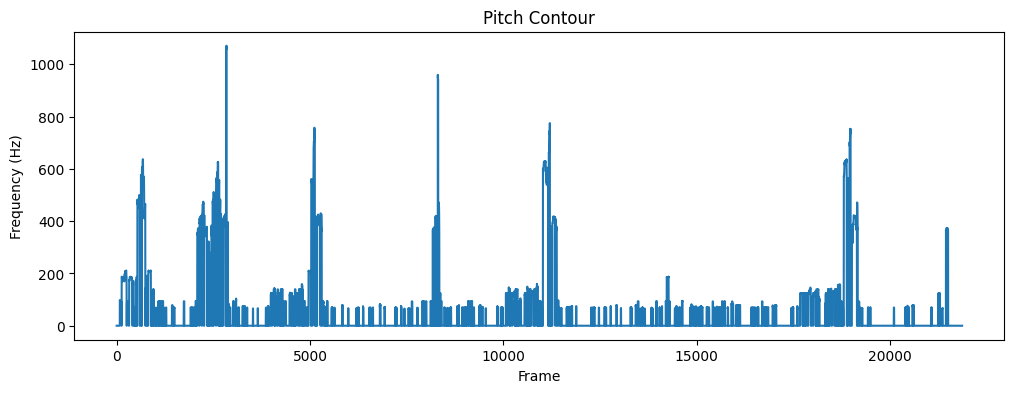

In [5]:
import librosa
import numpy as np
# audio_path =r"../data/voice/1DCnIad1Y0w.002.mp3"
audio_path =r"../data/voice/test_long.mp3"
# 加载音频
y, sr = librosa.load(audio_path, sr=None)

# 提取基频（F0）
f0, voiced_flag, voiced_probs = librosa.pyin(
    y, sr=sr, 
    fmin=librosa.note_to_hz('C2'),  # 最低频率（约65 Hz）
    fmax=librosa.note_to_hz('C7')   # 最高频率（约2093 Hz）
)

# 处理NaN值
f0 = np.nan_to_num(f0, nan=-1)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(f0, label='F0')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
plt.show()


# 将F0值转换为音高名称
notes = []
for frequency in f0:
    if frequency == 0:
        notes.append("无声")
    else:
        midi_number = librosa.hz_to_midi(frequency)
        note = librosa.midi_to_note(round(midi_number), cents=False)
        notes.append(note)

# 保存到文本文件
output_file = "f0_output.txt"
with open(output_file, "w") as file:
    file.write(f"音频文件: {audio_path}\n")
    file.write(f"采样率: {sr} Hz\n")
    file.write("时间点\tF0值(Hz)\t音高名称\n")
    for i in range(len(f0)):
        time = i / sr  # 时间（秒）
        file.write(f"{time:.3f}\t{f0[i]:.2f}\t{notes[i]}\n")

print(f"F0数据已保存到文件: {output_file}")

In [9]:

def freq_to_note(freq):
    """将频率转换为音高名称"""
    if freq == 0:
        return "无声"
    
    # A4 = 440Hz 对应 MIDI 编号69
    semitone = 12 * np.log2(freq / 440.0) + 69
    semitone = int(round(semitone))
    
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (semitone - 12) // 12
    note = notes[semitone % 12]
    return f"{note}{octave}"

# 加载音频
file_path = "../data/voice/test_long.mp3"
y, sr = librosa.load(file_path, sr=None)

# 提取基频
f0, voiced_flag, voiced_probs = librosa.pyin(
    y, sr=sr,
    fmin=librosa.note_to_hz('C2'),
    fmax=librosa.note_to_hz('C7')
)
f0 = np.nan_to_num(f0, nan=0.0)

# 计算时间间隔参数
hop_length = 512  # librosa默认的帧移
frame_duration = hop_length / sr  # 每帧的持续时间（秒）

# 打印表头
print(f"音频文件: {file_path}")
print(f"采样率: {sr} Hz")
print("时间点(时:分:秒)\tF0值(Hz)\t音高名称")

# 遍历所有帧
for i in range(len(f0)):
    # 计算时间点
    total_seconds = i * frame_duration
    hours = int(total_seconds // 3600)
    remainder = total_seconds % 3600
    minutes = int(remainder // 60)
    seconds = remainder % 60
    milliseconds = int((seconds - int(seconds)) * 1000)
    
    # 格式化为时:分:秒.毫秒
    time_str = f"{hours:02d}:{minutes:02d}:{int(seconds):02d}.{milliseconds:03d}"
    
    # 获取音高名称
    current_f0 = f0[i]
    note_name = freq_to_note(current_f0) if current_f0 > 0 else "无声"
    
    # 输出结果
    print(f"{time_str}\t{current_f0:.2f}\t{note_name}")


音频文件: ../data/voice/test_long.mp3
采样率: 44100 Hz
时间点(时:分:秒)	F0值(Hz)	音高名称
00:00:00.000	0.00	无声
00:00:00.011	0.00	无声
00:00:00.023	0.00	无声
00:00:00.034	0.00	无声
00:00:00.046	0.00	无声
00:00:00.058	0.00	无声
00:00:00.069	0.00	无声
00:00:00.081	0.00	无声
00:00:00.092	0.00	无声
00:00:00.104	0.00	无声
00:00:00.116	0.00	无声
00:00:00.127	0.00	无声
00:00:00.139	0.00	无声
00:00:00.150	0.00	无声
00:00:00.162	0.00	无声
00:00:00.174	0.00	无声
00:00:00.185	0.00	无声
00:00:00.197	0.00	无声
00:00:00.208	0.00	无声
00:00:00.220	0.00	无声
00:00:00.232	0.00	无声
00:00:00.243	0.00	无声
00:00:00.255	0.00	无声
00:00:00.267	0.00	无声
00:00:00.278	0.00	无声
00:00:00.290	0.00	无声
00:00:00.301	0.00	无声
00:00:00.313	0.00	无声
00:00:00.325	0.00	无声
00:00:00.336	0.00	无声
00:00:00.348	0.00	无声
00:00:00.359	0.00	无声
00:00:00.371	0.00	无声
00:00:00.383	0.00	无声
00:00:00.394	0.00	无声
00:00:00.406	0.00	无声
00:00:00.417	0.00	无声
00:00:00.429	0.00	无声
00:00:00.441	0.00	无声
00:00:00.452	0.00	无声
00:00:00.464	0.00	无声
00:00:00.476	0.00	无声
00:00:00.487	0.00	无声
00:00:00.499	0.00	无声
00:0

In [6]:
# 将F0值转换为音高名称
notes = []
for frequency in f0:
    if frequency == 0:
        notes.append("无声")
    else:
        midi_number = librosa.hz_to_midi(frequency)
        note = librosa.midi_to_note(round(midi_number), cents=False)
        notes.append(note)

# 输出到控制台
print(f"音频文件: {audio_path}")
print(f"采样率: {sr} Hz")
print("时间点\tF0值(Hz)\t音高名称")
for i in range(len(f0)):
    time = i / sr  # 时间（秒）
    print(f"{time:.3f}\t{f0[i]:.2f}\t{notes[i]}")

音频文件: ../data/voice/test_long.mp3
采样率: 44100 Hz
时间点	F0值(Hz)	音高名称
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.000	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	无声
0.001	0.00	

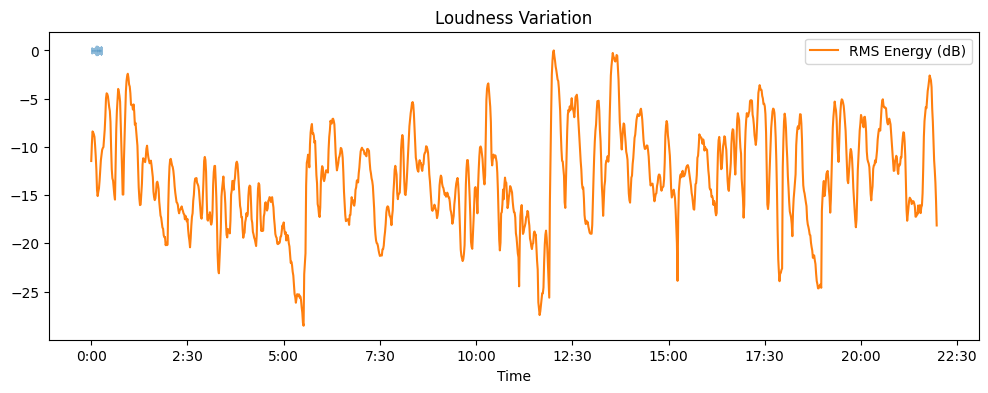

In [2]:
# 计算短时RMS能量
rms = librosa.feature.rms(y=y, frame_length=2048, hop_length=512)[0]

# 转换为分贝（dB）
rms_db = librosa.amplitude_to_db(rms, ref=np.max)

# 可视化
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, alpha=0.5, sr=sr)
plt.plot(rms_db, label='RMS Energy (dB)')
plt.legend()
plt.title('Loudness Variation')
plt.show()


In [3]:
# 分割非静音段（top_db参数控制灵敏度）
intervals = librosa.effects.split(
    y, top_db=20, 
    frame_length=2048, hop_length=512
)

# 计算各段持续时间（秒）
speech_durations = [(end - start)/sr for start, end in intervals]

# 分析变化
mean_duration = np.mean(speech_durations)
std_duration = np.std(speech_durations)
print(f"平均语音段长度: {mean_duration:.2f}s ± {std_duration:.2f}s")


平均语音段长度: 0.74s ± 0.71s
